In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from os import listdir
from scipy.spatial.distance import pdist, squareform

rcParams = {'font.size': 24 , 'font.weight': 'bold', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal', 'lines.linewidth':3}

def Load_Coverage_Summary(data_dir, breadth = 90):
    files = listdir(data_dir)
    df_Summary = pd.DataFrame()
    for f in files:
        if f.startswith("Hot"):
            df = pd.read_csv(data_dir+f, sep = "\t")
            df_Summary = df_Summary.append(df, ignore_index = True)

    df_breadth = df_Summary.pivot_table(index = 'Sample', columns = 'Subject',values = 'Breadth_Coverage')
    df_breadth = df_breadth.fillna(0).reset_index()
    df_breadth['Sample'] = df_breadth['Sample'].str.replace("_FD.paf.gz","")
    df_breadth = df_breadth.set_index('Sample')

    df_depth = df_Summary.pivot_table(index = 'Sample', columns = 'Subject',values = 'Avg_Depth_Coverage')
    df_depth = df_depth.fillna(0).reset_index()

    df_reads = df_Summary.pivot_table(index = 'Sample', columns = 'Subject',values = 'Num_Reads')
    df_reads = df_reads.fillna(0).reset_index()
    
    FM = df_breadth.values#df.filter(regex = "Group_*").values
    FM[FM < breadth] = 0
    FM[FM >= breadth] = 1
    
    Dist_Mat = squareform(pdist(FM, metric = "hamming"))
    index = df_breadth.index.tolist()
    return Dist_Mat, index

def Plot_Heatmap(Dist_Mat, index_vec, sample_spring):
    plt.rcParams.update(rcParams)

    MAT = Dist_Mat

    fig = plt.figure(figsize=(22,17))
    axdendro = fig.add_axes([0.1,0.25,0.2,0.7])
    Y = sch.linkage(MAT, method='ward',optimal_ordering=True)
    Z = sch.dendrogram(Y, orientation='right')#, color_threshold = 0.90005*max(Y[:,2]))
    index = Z['leaves']
    ticks = np.array(index_vec)
    axdendro.set_xticks([])
    axdendro.set_yticklabels(ticks[index], size = 16)
    a = [axdendro.get_yticklabels()[i].set_color('red')  
         if (sample_spring[ticks[index][i]] == 'Mushroom' ) 
         else axdendro.get_yticklabels()[i].set_color('blue') 
         for i in range(len(axdendro.get_yticklabels()))]

    axmatrix = fig.add_axes([0.31,0.25,0.62,0.7])

    MAT = MAT[index,:]
    MAT = MAT[:,index]
    MAT = np.round(MAT, 2)
    #MAT[MAT == 0] = np.inf
    im = axmatrix.imshow(MAT, aspect='auto', origin='lower', interpolation = 'none', cmap = 'jet', alpha = 0.9)
    axmatrix.set_xticks(list(range(0, len(ticks))))
    axmatrix.set_xticklabels(ticks[index], rotation = 90, size = 20)
    axmatrix.xaxis.set_ticks_position('bottom')
    ng = len(ticks)
    axmatrix.set_xticks(np.arange(-.5, 34, 1), minor=True)
    axmatrix.set_yticks(np.arange(-.5, 34, 1), minor=True)
    a = [axmatrix.get_xticklabels()[i].set_color('red')  
         if (sample_spring[ticks[index][i]] == 'Mushroom' ) 
         else axmatrix.get_xticklabels()[i].set_color('blue') 
         for i in range(len(axmatrix.get_xticklabels()))]

    # Gridlines based on minor ticks
    axmatrix.grid(which='minor', color='white', linestyle='-', linewidth=3)

    axmatrix.set_yticks([])

    axcolor = fig.add_axes([0.94,0.25,0.0075,0.7])
    plt.colorbar(im, cax=axcolor)

    fig.subplots_adjust(bottom = 0.001, left = 0.01)
    
    return fig

In [2]:
df_Metadata = pd.read_csv('/Users/harihara/Research-Activities/Data/Hot-Spring/hotspring_metadata.csv', 
                              sep = ",", index_col = 'SampleID')
sample_spring = dict(zip(df_Metadata.index.tolist(), df_Metadata.Spring_Name.tolist()))
data_dir = '/Users/harihara/Mount-2/hotspring_metagenome/Synechococcus_paper_analysis/\
Hotsprings_Variant_Structure_Data_Analysis/'

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


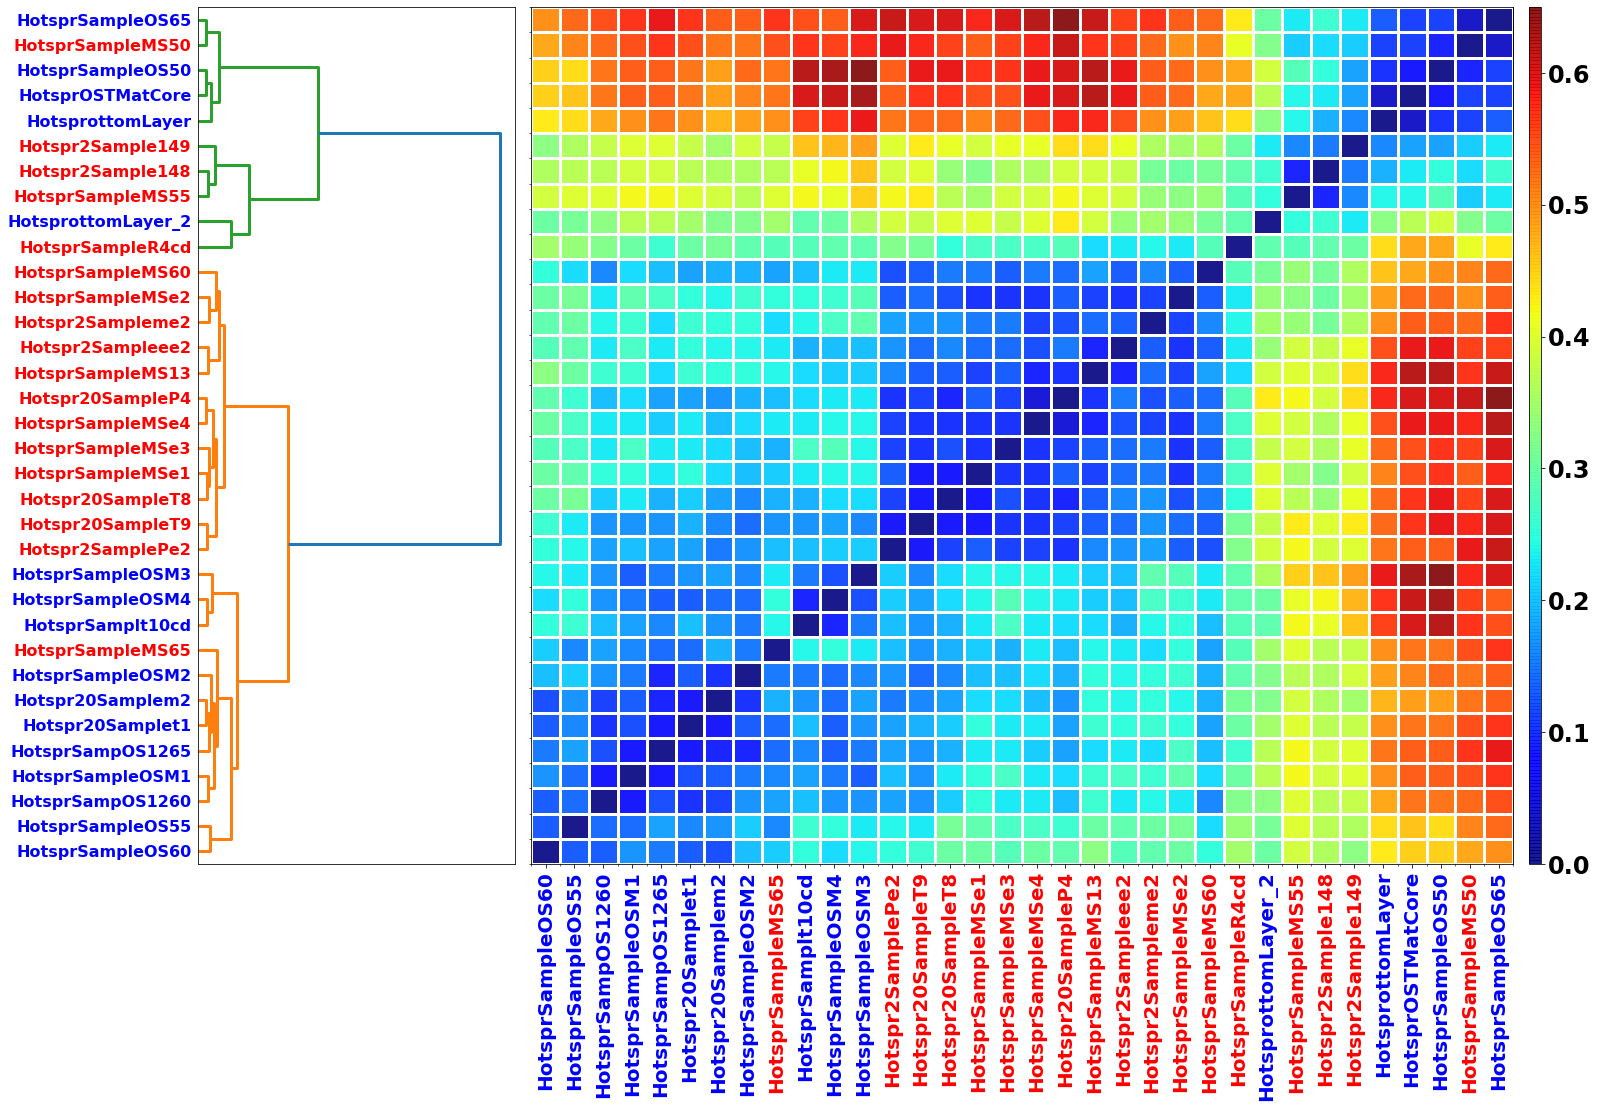

In [3]:
Dist_Aerophilum, index = Load_Coverage_Summary(data_dir+'Aerophilum/Read_alignments_novel_contigs/Summarized_Coverages/', 90)
fig = Plot_Heatmap(Dist_Aerophilum, index, sample_spring)

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


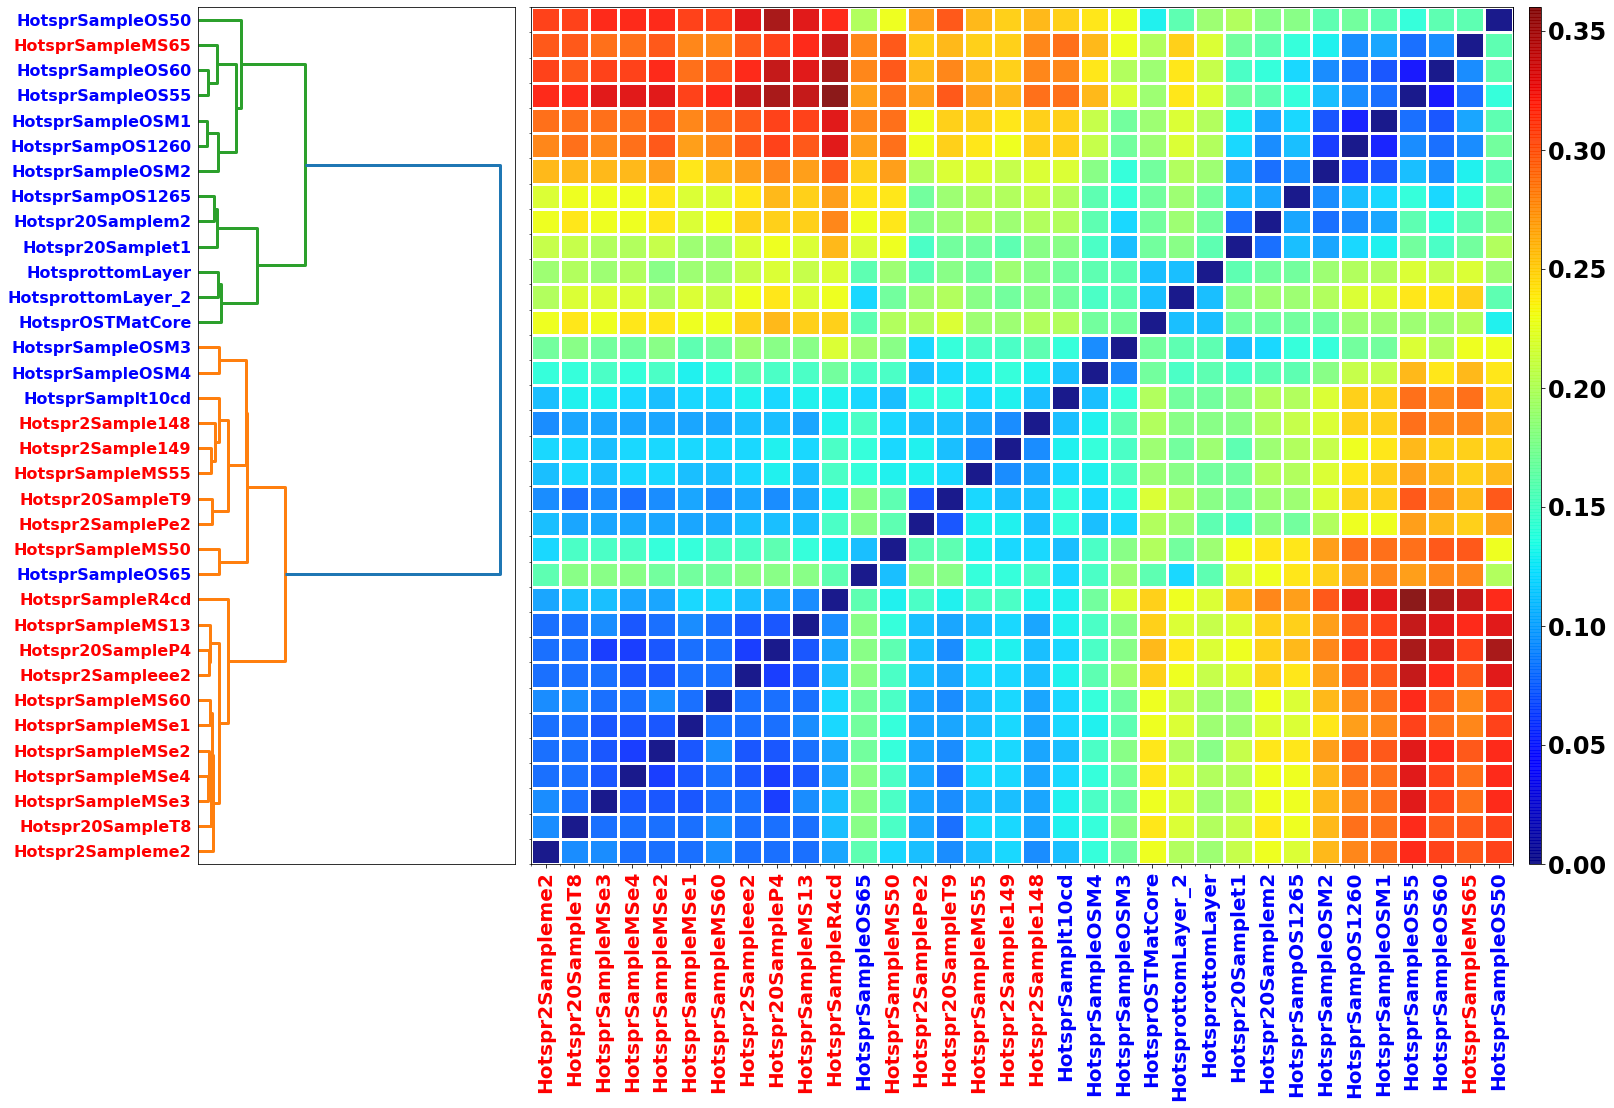

In [4]:
Dist_Chloroflexus, index = Load_Coverage_Summary(data_dir+'Chloroflexus_MS_G/Read_alignments_novel_contigs/\
Summarized_Coverages/', 90)
fig = Plot_Heatmap(Dist_Chloroflexus, index, sample_spring)

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


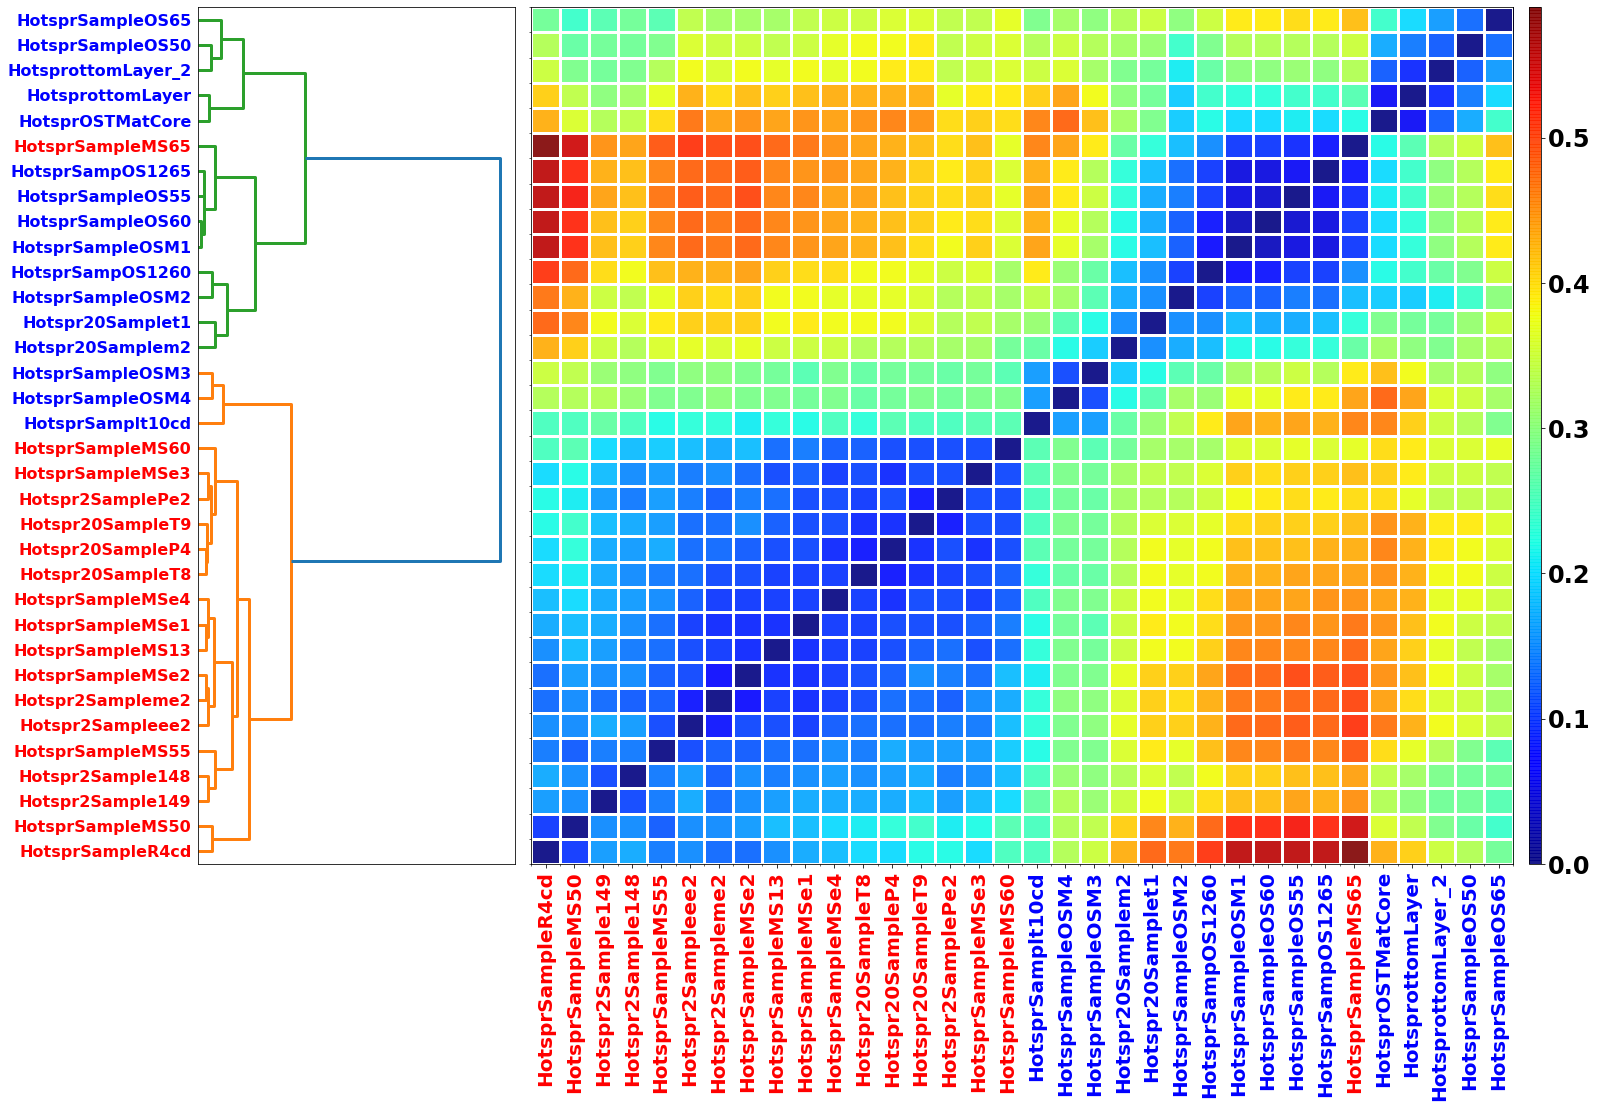

In [5]:
Dist_Synechococcus, index, = Load_Coverage_Summary(data_dir+'Synechococcus/Read_alignments_novel_contigs/\
Summarized_Coverages/', 95)
fig = Plot_Heatmap(Dist_Synechococcus, index, sample_spring)

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


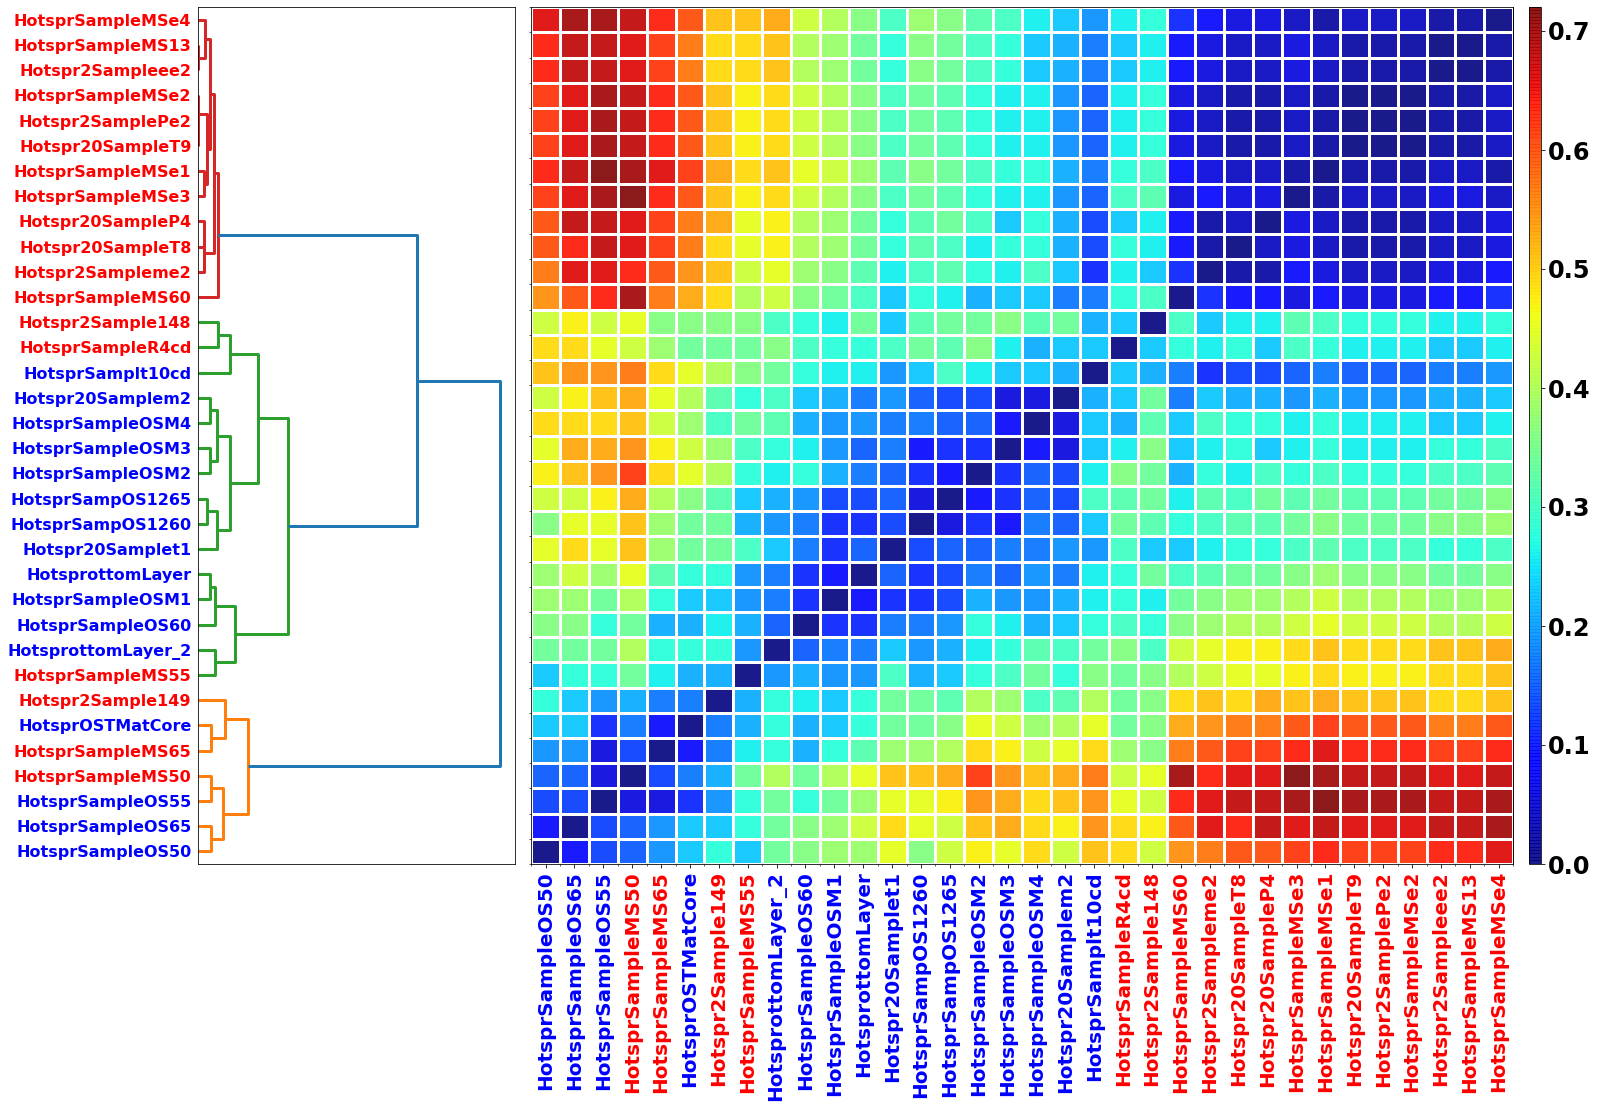

In [6]:
Dist_Chloracidobacterium, index = Load_Coverage_Summary(data_dir+'Chloracidobacterium_thermophilum_B/\
Read_alignments_novel_contigs/Summarized_Coverages/', 90)
fig = Plot_Heatmap(Dist_Chloracidobacterium, index, sample_spring)

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


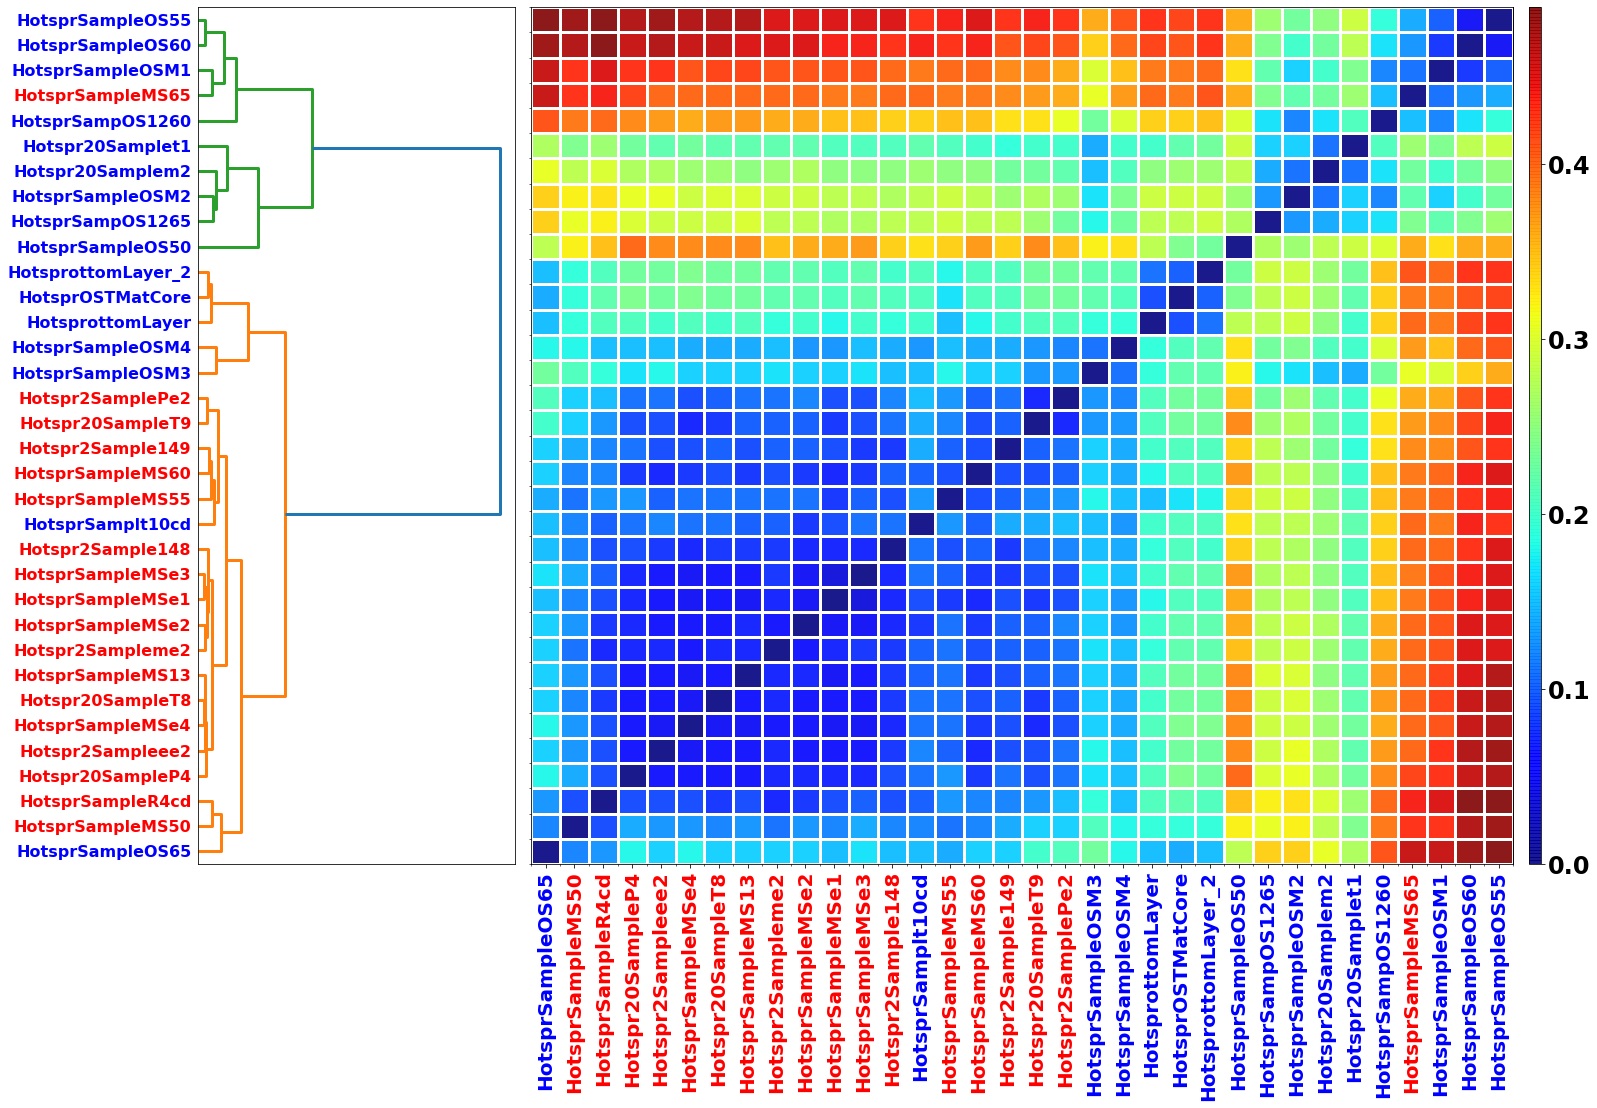

In [7]:
Dist_Roseiflexus, index = Load_Coverage_Summary(data_dir+'Roseiflexus/\
Read_alignments_novel_contigs/Summarized_Coverages/', 90)
fig = Plot_Heatmap(Dist_Roseiflexus, index, sample_spring)

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


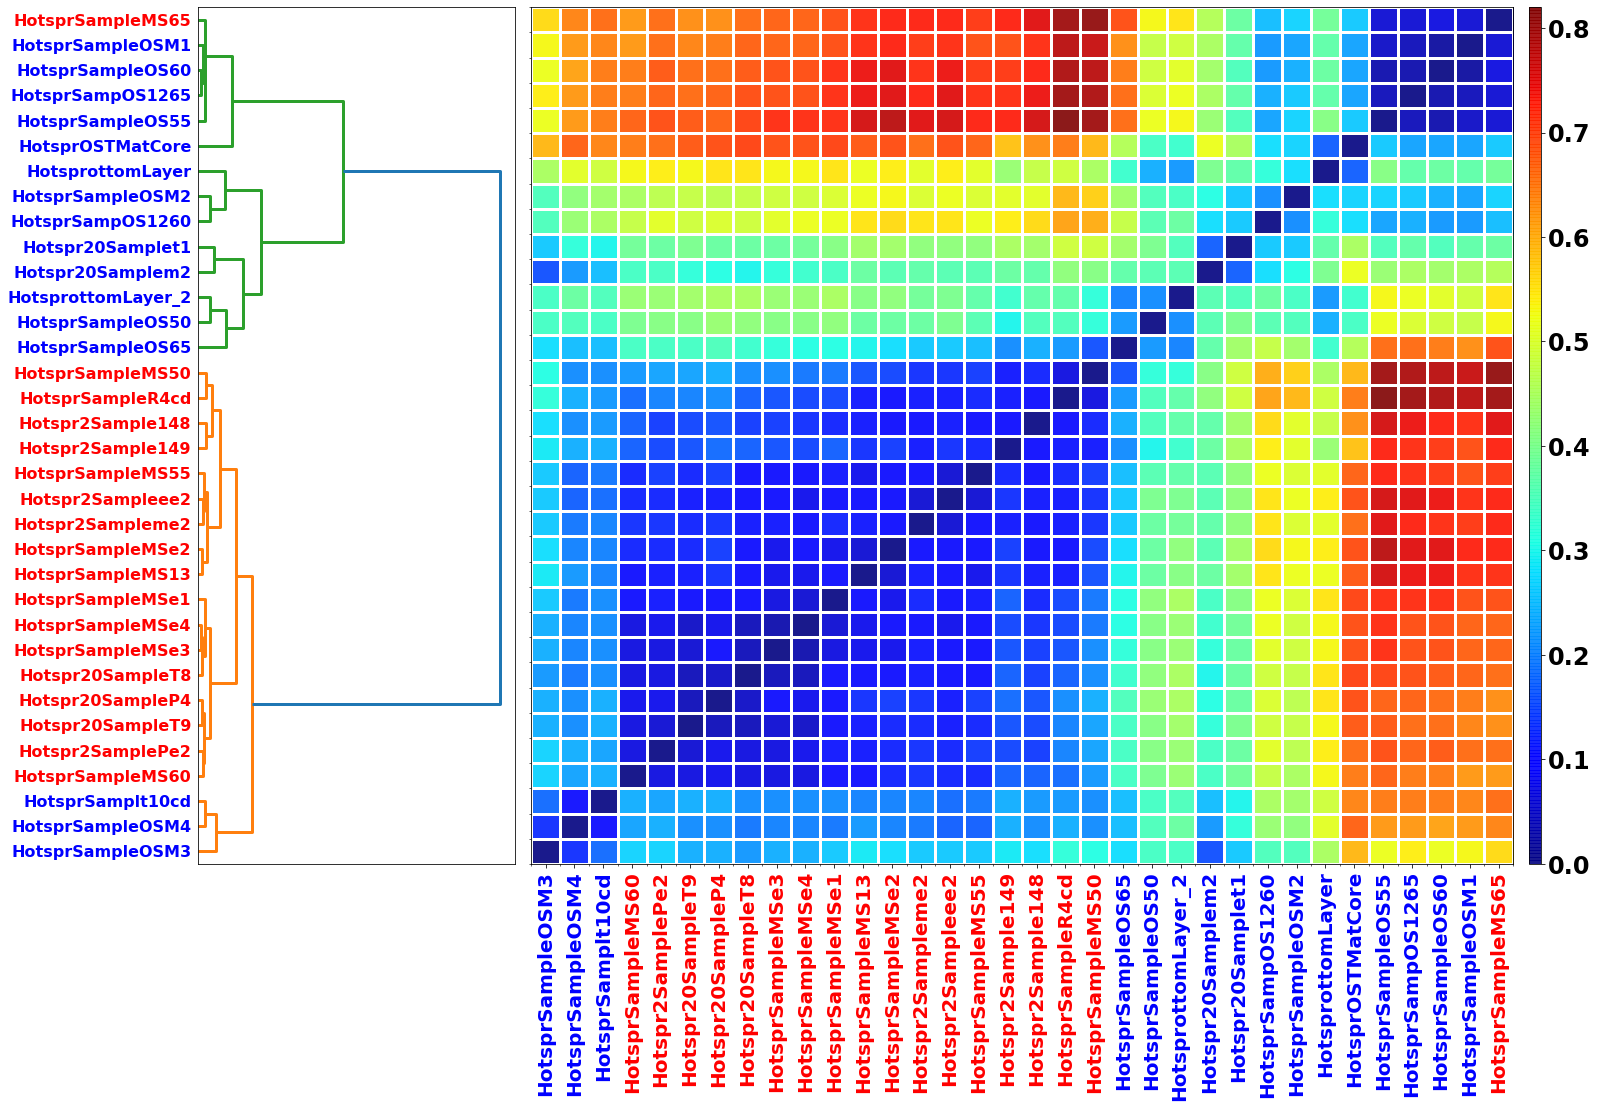

In [8]:
Dist_OSA, index = Load_Coverage_Summary(data_dir+'OSA/\
Read_alignments_novel_contigs/Summarized_Coverages/', 90)
fig = Plot_Heatmap(Dist_OSA, index, sample_spring)

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


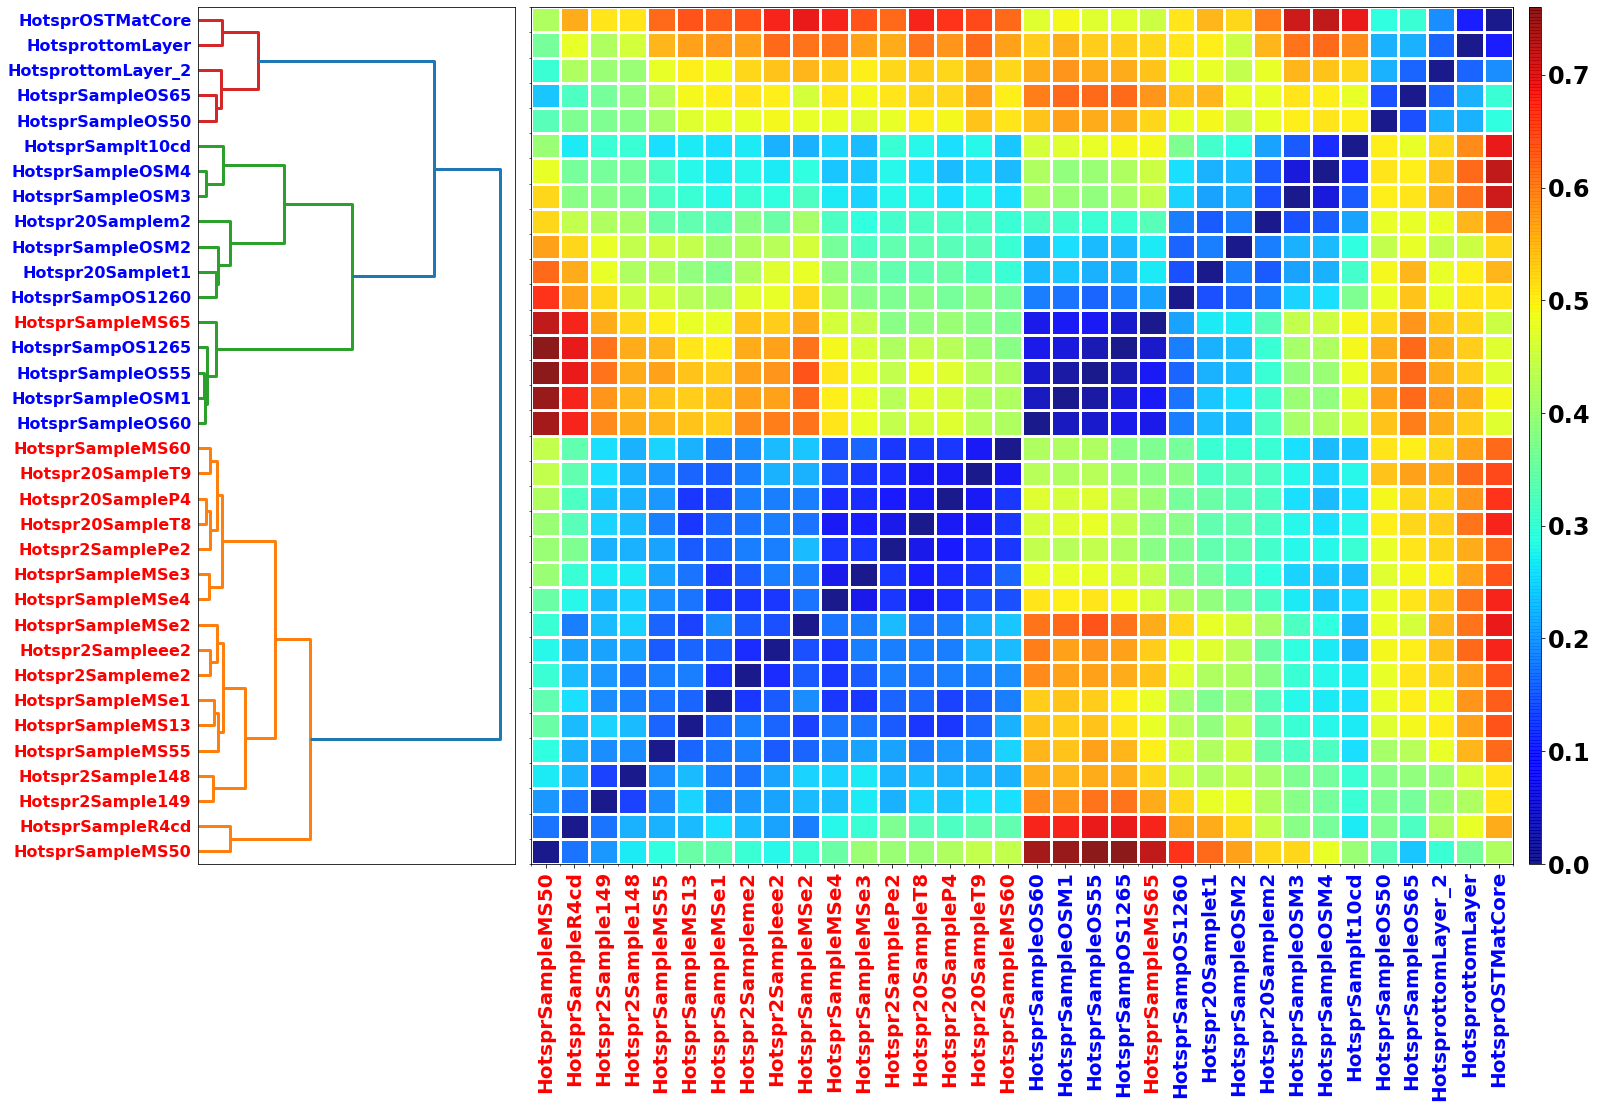

In [9]:
Dist_OSB, index = Load_Coverage_Summary(data_dir+'OSB/Read_alignments_novel_contigs/Summarized_Coverages/', 90)
fig = Plot_Heatmap(Dist_OSB, index, sample_spring)

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


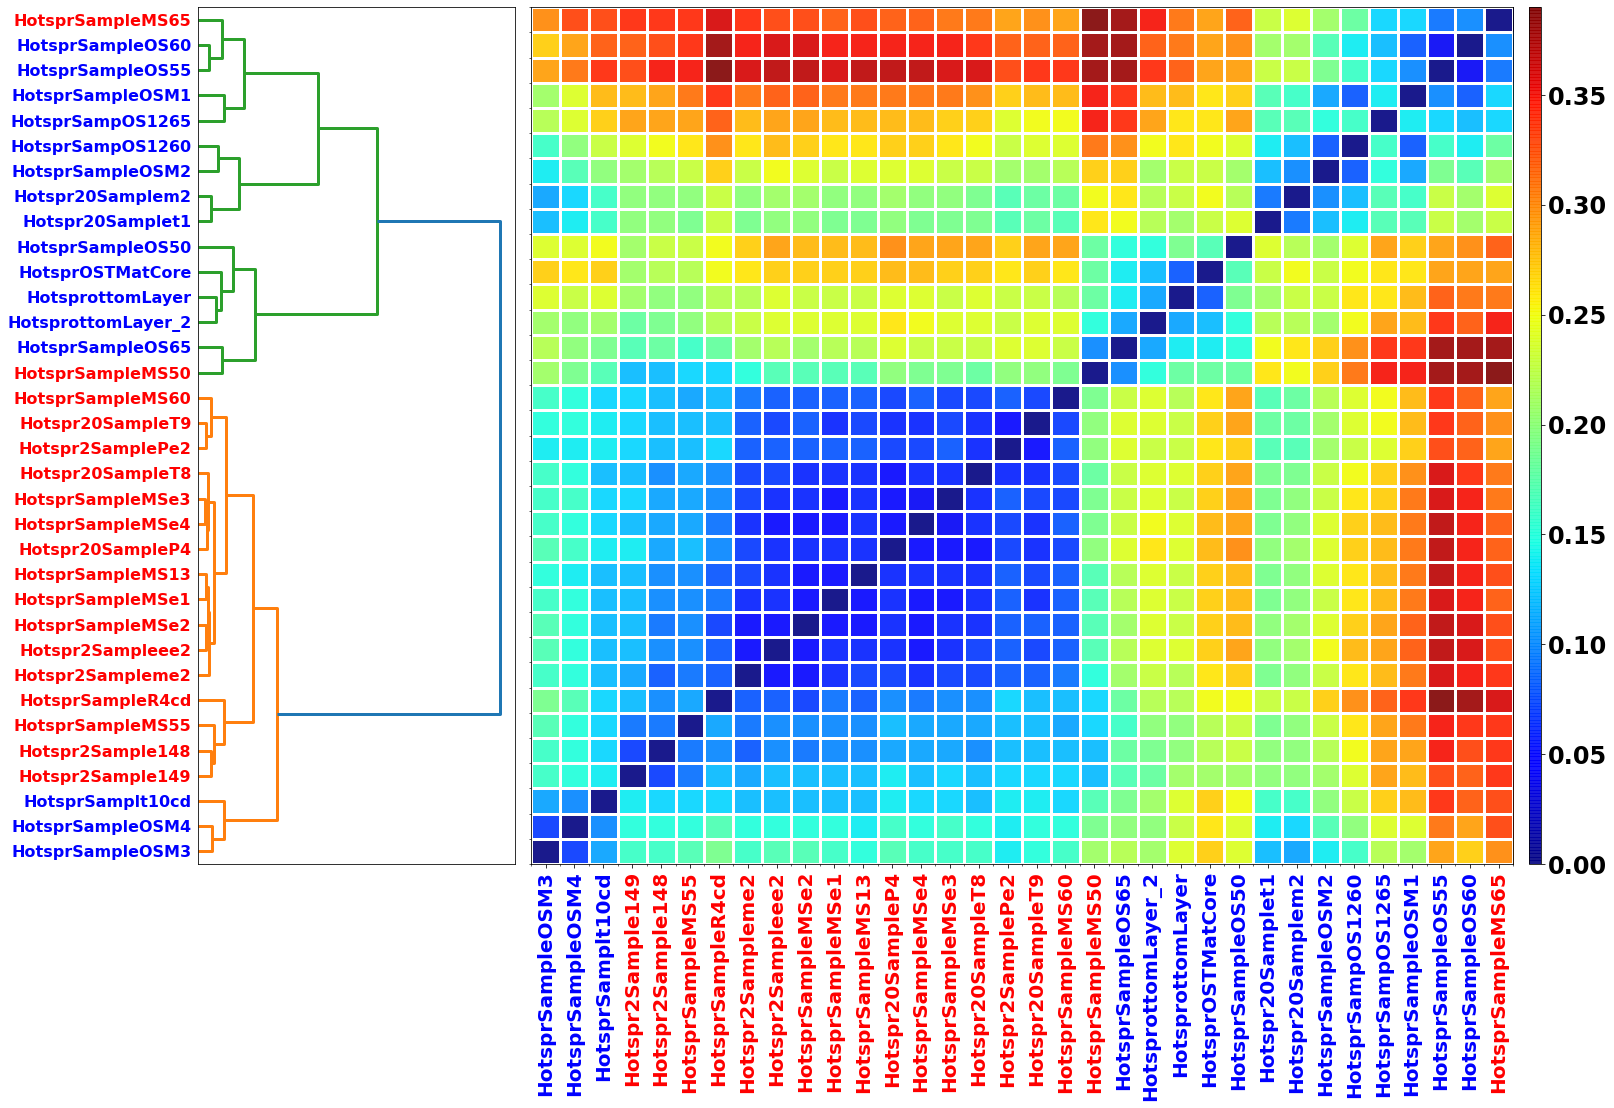

In [10]:
Dist_All, index = Load_Coverage_Summary(data_dir+'All_Genomes/Read_alignments_novel_contigs/Summarized_Coverages/', 90)
fig = Plot_Heatmap(Dist_All, index, sample_spring)